# CO2 Emission Prediction


### <font color='green'> Importing some important libraries </font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## <font color='green'> EDA (Exploratory Data Analysis)</font>

In [512]:
df = pd.read_csv('co2_emissions (1).csv')

In [513]:
df.head(10)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS,Z,10.6,7.5,9.2,31,212


In [514]:
df.isnull().sum()

,0
make,0
model,0
vehicle_class,0
engine_size,0
cylinders,0
transmission,0
fuel_type,0
fuel_consumption_city,0
fuel_consumption_hwy,0
fuel_consumption_comb(l/100km),0


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [516]:
df.shape

(7385, 12)

In [517]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_consumption_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_consumption_comb(l/100km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_consumption_comb(mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2_emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [518]:
# checking duplicate values
df.duplicated().sum()

1112

In [519]:
# droping all the duplicate values
df.drop_duplicates(inplace=True)

In [520]:
len(df)

6273

In [521]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,6273.0,3.163000,1.365294,0.9,2.0,3.0,3.7,8.4
cylinders,6273.0,5.620596,1.846424,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,6273.0,12.615591,3.550572,4.2,10.1,12.1,14.7,30.6
fuel_consumption_hwy,6273.0,9.073426,2.277893,4.0,7.5,8.7,10.3,20.6
fuel_consumption_comb(l/100km),6273.0,11.022111,2.945028,4.1,8.9,10.6,12.7,26.1
fuel_consumption_comb(mpg),6273.0,27.395026,7.225472,11.0,22.0,27.0,32.0,69.0
co2_emissions,6273.0,251.247250,59.235396,96.0,208.0,246.0,289.0,522.0


In [522]:
df.reset_index(drop=True, inplace=True)

In [523]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


## <font color='red'>Visualization</font>

### <font color='green'> Brands of Cars </font>

In [524]:
print("We have total",len(df['make'].unique()),"Car Companies Data")
df_brand = df['make'].value_counts().reset_index().rename(columns={'count':'Count'})
df_brand.head(20)

We have total 42 Car Companies Data


,make,Count
0,FORD,575
1,CHEVROLET,515
2,BMW,501
3,MERCEDES-BENZ,365
4,PORSCHE,296
5,GMC,289
6,TOYOTA,274
7,AUDI,263
8,NISSAN,213
9,MINI,200


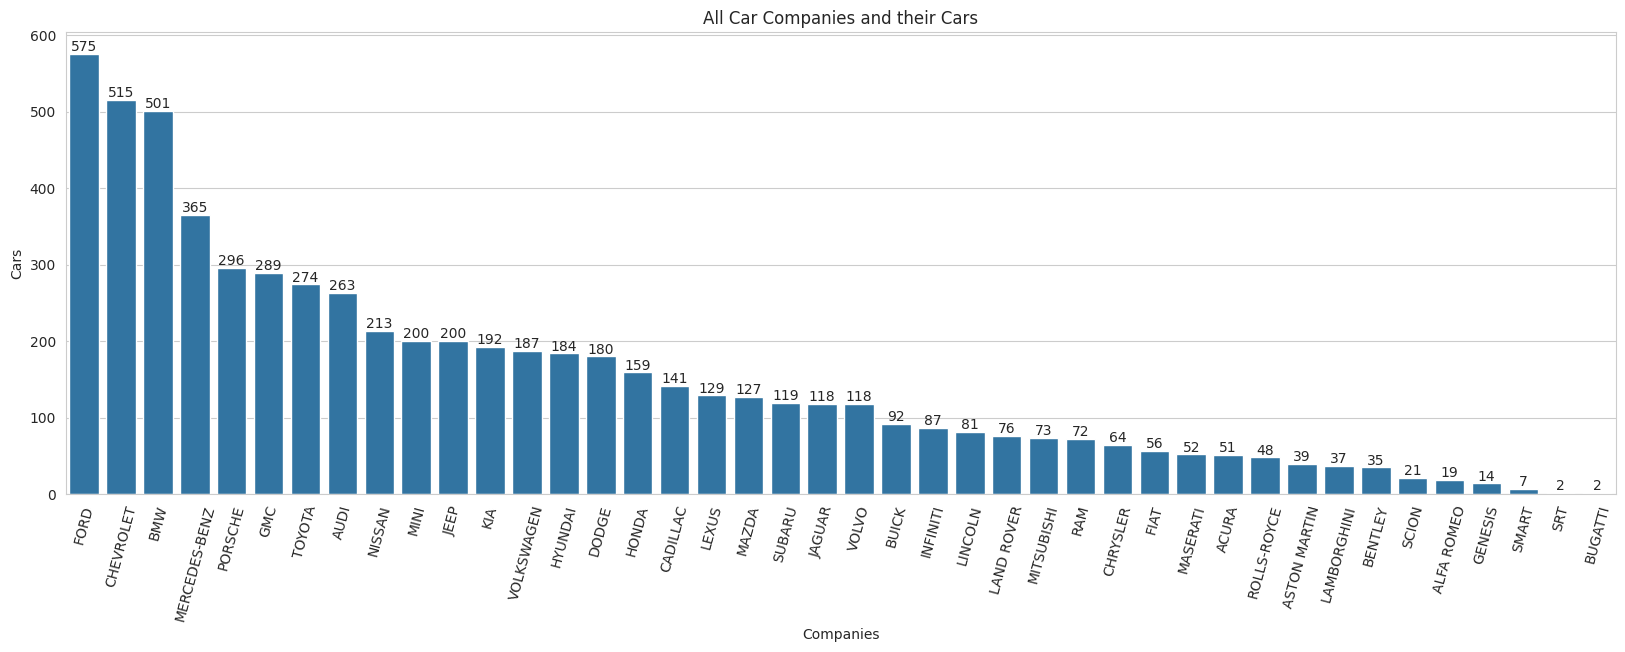

In [525]:
plt.figure(figsize=(20,6))
figure1 = sns.barplot(data = df_brand, x = "make",  y= "Count")
plt.xticks(rotation = 75)
plt.title("All Car Companies and their Cars")
plt.xlabel("Companies")
plt.ylabel("Cars")
plt.bar_label(figure1.containers[0])
plt.show()

### <font color=green> Models of cars </font>

In [526]:
print("We have total",len(df['model'].unique()),"Car Models")
df_model = df['model'].value_counts().reset_index().rename(columns={'count':'Count'})[:25]
df_model.head(20)

We have total 2053 Car Models


,model,Count
0,F-150 FFV,32
1,F-150 FFV 4X4,31
2,MUSTANG,26
3,FOCUS FFV,24
4,F-150 4X4,20
5,F-150,19
6,SONIC 5,18
7,ATS,18
8,JETTA,18
9,COMPASS,18


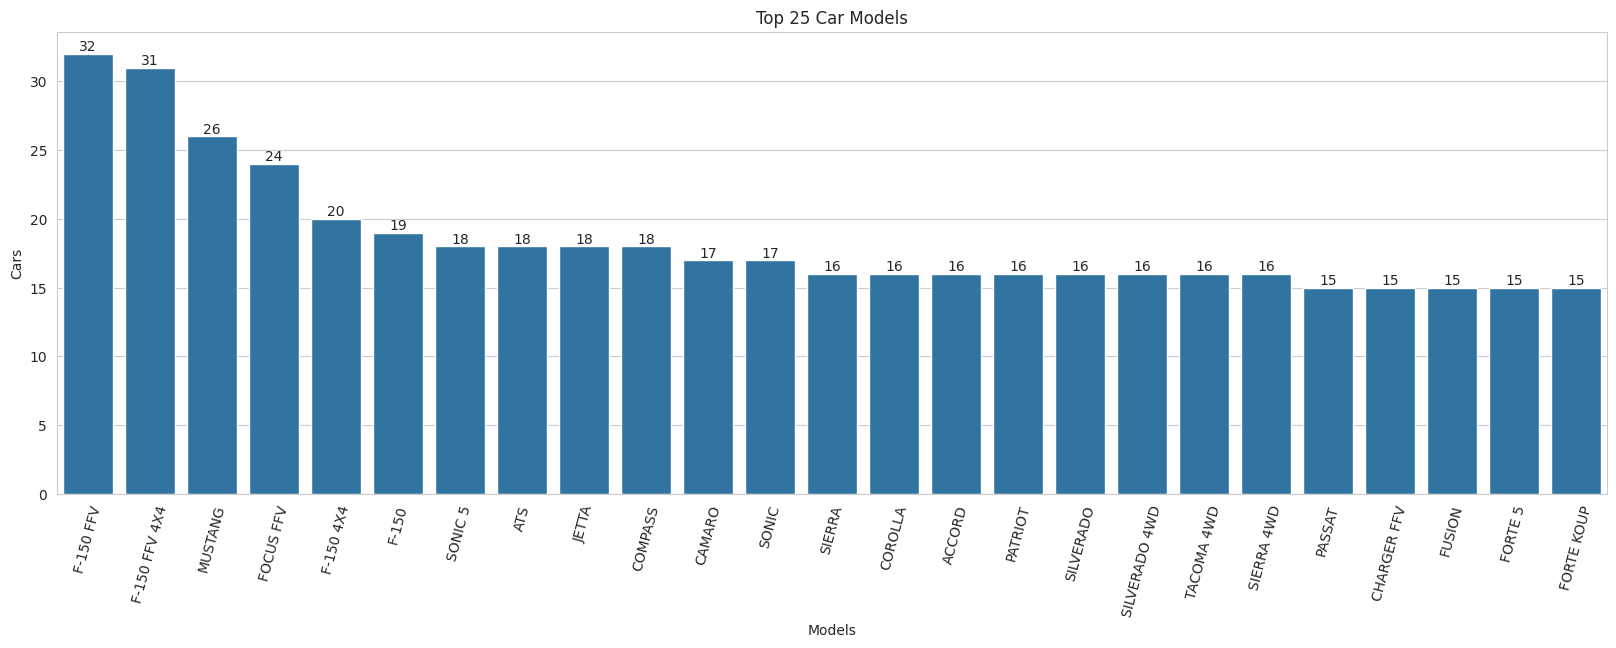

In [527]:
plt.figure(figsize=(20,6))
figure2 = sns.barplot(data = df_model, x = "model",  y= "Count")
plt.xticks(rotation = 75)
plt.title("Top 25 Car Models")
plt.xlabel("Models")
plt.ylabel("Cars")
plt.bar_label(figure2.containers[0])
plt.show()

### <font color=green> Vehicle Class </font>

In [528]:
print("We have total",len(df['vehicle_class'].unique()),"vehicle_class")
df_vehicle_class = df['vehicle_class'].value_counts().reset_index().rename(columns={'count':'Count'})
df_vehicle_class

We have total 16 vehicle_class


,vehicle_class,Count
0,SUV - SMALL,1004
1,MID-SIZE,981
2,COMPACT,902
3,SUV - STANDARD,613
4,SUBCOMPACT,532
5,FULL-SIZE,508
6,PICKUP TRUCK - STANDARD,474
7,TWO-SEATER,381
8,MINICOMPACT,274
9,STATION WAGON - SMALL,212


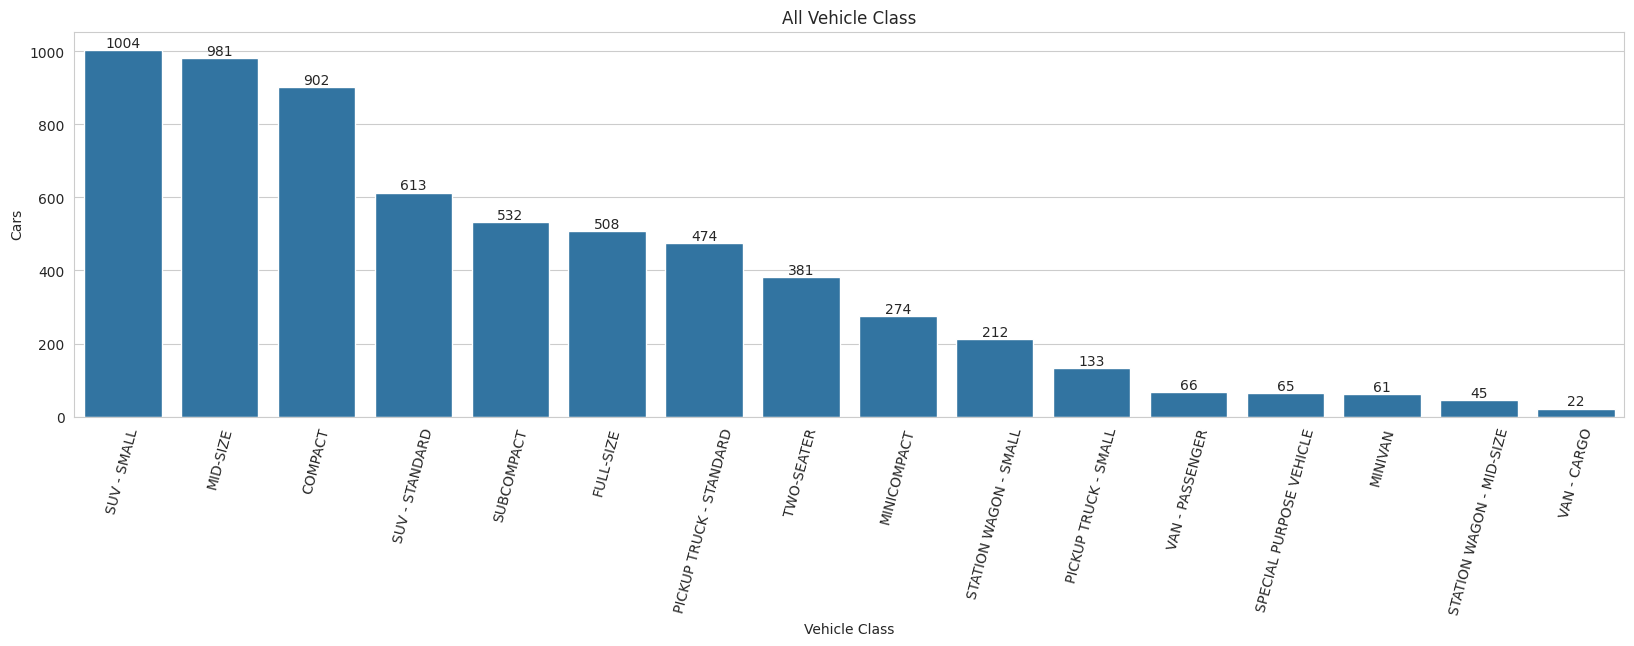

In [529]:
plt.figure(figsize=(20,5))
figure3 = sns.barplot(data = df_vehicle_class, x = "vehicle_class",  y= "Count")
plt.xticks(rotation = 75)
plt.title("All Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Cars")
plt.bar_label(figure3.containers[0])
plt.show()

### <font color='green'> Engine Sizes of cars</font>

In [530]:
print("We have total",len(df['engine_size'].unique()),"Types of Engine Size")
df_engine_size = df['engine_size'].value_counts().reset_index().rename(columns={'count':'Count'})
df_engine_size.head(20)

We have total 51 Types of Engine Size


,engine_size,Count
0,2.0,1260
1,3.0,687
2,3.6,433
3,3.5,431
4,2.5,353
5,2.4,287
6,1.6,272
7,5.3,240
8,1.8,187
9,5.0,178


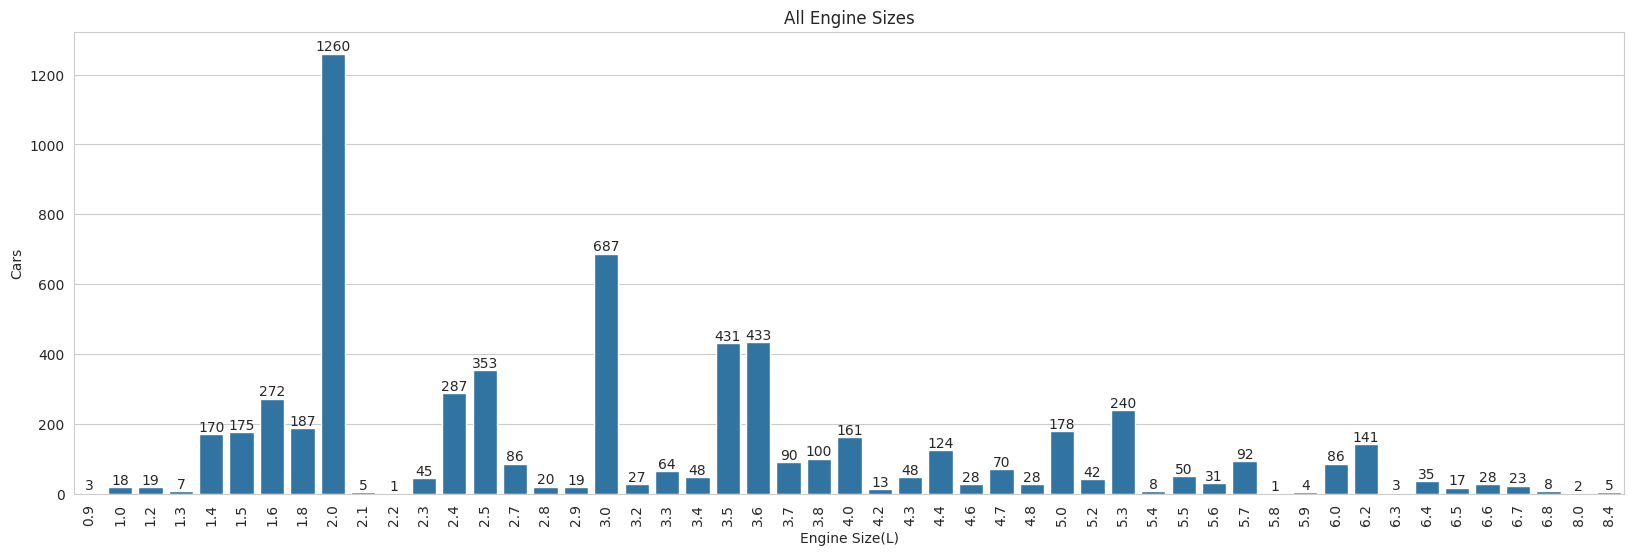

In [531]:
plt.figure(figsize=(20,6))
figure4 = sns.barplot(data = df_engine_size, x = "engine_size",  y= "Count")
plt.xticks(rotation = 90)
plt.title("All Engine Sizes")
plt.xlabel("Engine Size(L)")
plt.ylabel("Cars")
plt.bar_label(figure4.containers[0])
plt.show()

### <font color='green'> Cylinders </font>

In [532]:
print("We have total",len(df['cylinders'].unique()),"Types of Cylinders")
df_cylinders = df['cylinders'].value_counts().reset_index().rename(columns={'count':'Count'})
df_cylinders.head(20)

We have total 8 Types of Cylinders


,cylinders,Count
0,4,2741
1,6,2040
2,8,1201
3,12,135
4,3,88
5,10,40
6,5,26
7,16,2


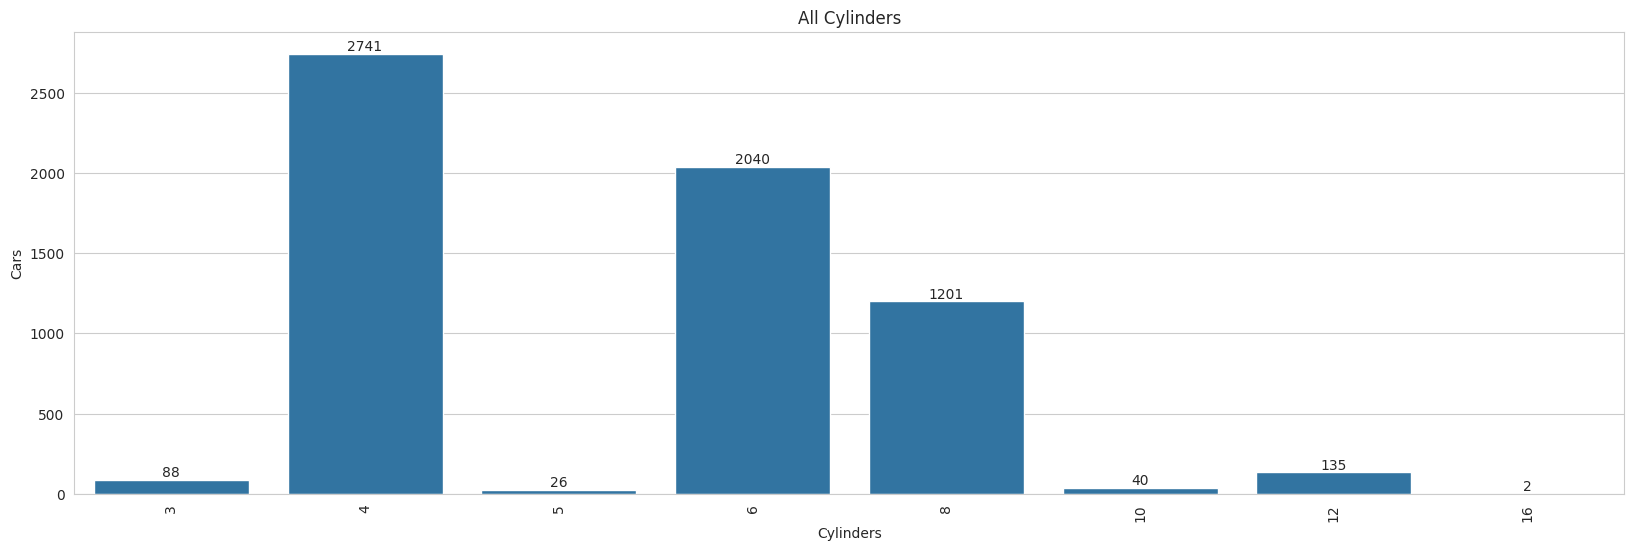

In [533]:
plt.figure(figsize=(20,6))
figure5 = sns.barplot(data = df_cylinders, x = "cylinders",  y= "Count")
plt.xticks(rotation = 90)
plt.title("All Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Cars")
plt.bar_label(figure5.containers[0])
plt.show()

### <font color='green'> Transmission of Cars </font>

In [534]:
df['transmission'].unique()

array(['AS', 'M', 'AV', 'AM', 'A'], dtype=object)

#### Here we have to map similar labels into a single label for our Transmission column.

In [535]:
df["transmission"] = np.where(df["transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["M5", "M6", "M7"]), "Manual", df["transmission"])

In [536]:
print("We have total",len(df['transmission'].unique()),"transmissions")
df_transmission = df['transmission'].value_counts().reset_index().rename(columns={'count':'Count'})
df_transmission

We have total 5 transmissions


,transmission,Count
0,AS,2720
1,A,1536
2,M,1019
3,AM,540
4,Continuously Variable,458


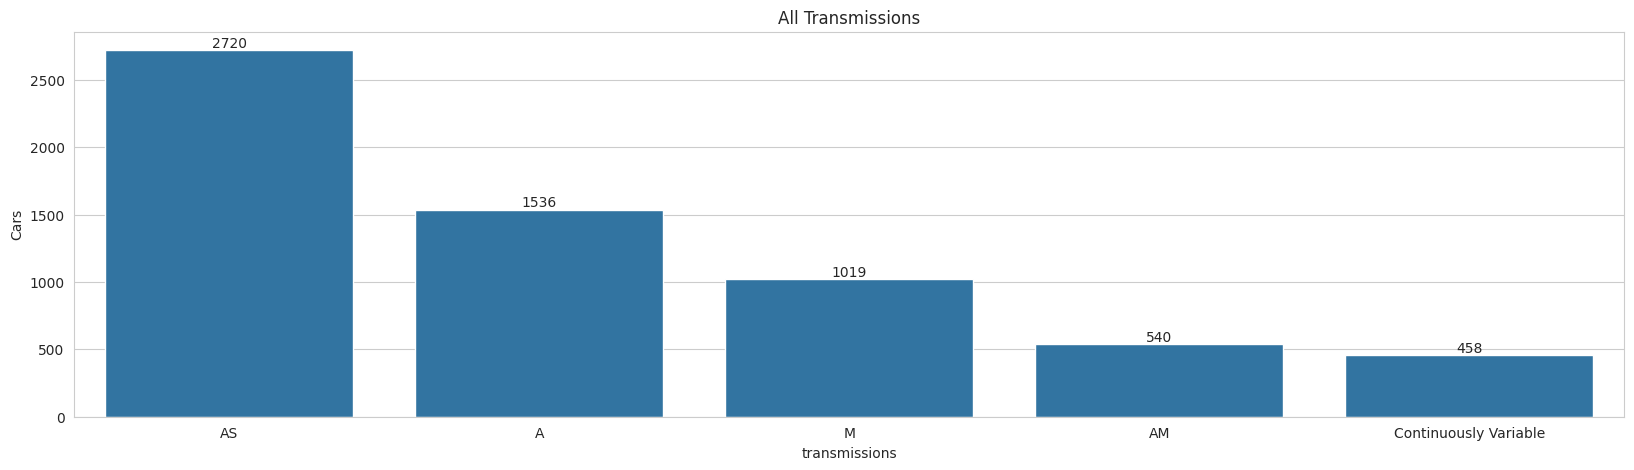

In [537]:
plt.figure(figsize=(20,5))
figure6 = sns.barplot(data = df_transmission, x = "transmission",  y= "Count")
plt.title("All Transmissions")
plt.xlabel("transmissions")
plt.ylabel("Cars")
plt.bar_label(figure6.containers[0])
plt.show()

### <font color='green'> Fuel Type of Cars </font>

In [538]:
df['fuel_type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

#### Here we have to map similar labels into a single label for our Fuel Type column.

In [539]:
df["fuel_type"] = np.where(df["fuel_type"]=="Z", "Premium Gasoline", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="X", "Regular Gasoline", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="D", "Diesel", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="E", "Ethanol(E85)", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="N", "Natural Gas", df["fuel_type"])

In [540]:
print("We have total",len(df['fuel_type'].unique()),"fuel_type")
df_fuel_type = df['fuel_type'].value_counts().reset_index().rename(columns={'count':'Count'})
df_fuel_type

We have total 5 fuel_type


,fuel_type,Count
0,Regular Gasoline,3030
1,Premium Gasoline,2765
2,Ethanol(E85),330
3,Diesel,147
4,Natural Gas,1


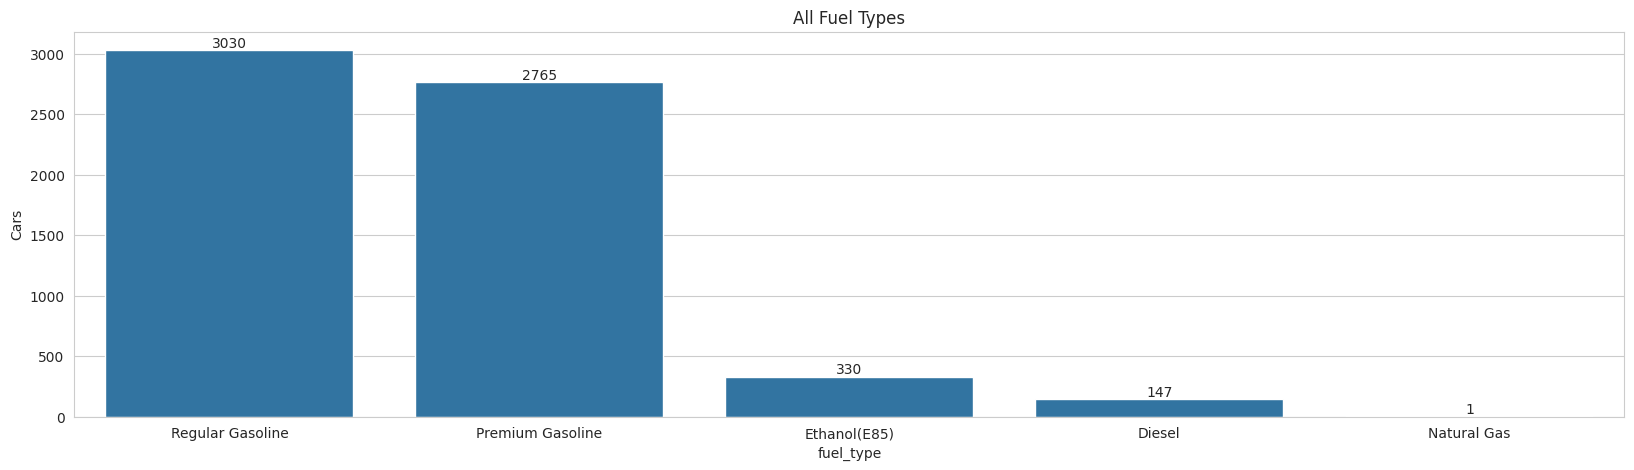

In [541]:
plt.figure(figsize=(20,5))
figure7 = sns.barplot(data = df_fuel_type, x = "fuel_type",  y= "Count")
plt.title("All Fuel Types")
plt.xlabel("fuel_type")
plt.ylabel("Cars")
plt.bar_label(figure7.containers[0])
plt.show()

### <font color='green'> Distplot </font>

<Axes: xlabel='co2_emissions', ylabel='Density'>

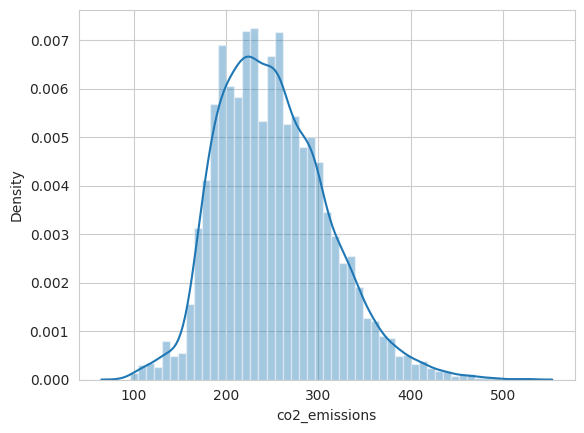

In [542]:
sns.distplot(df['co2_emissions'])

<Axes: xlabel='cylinders', ylabel='Density'>

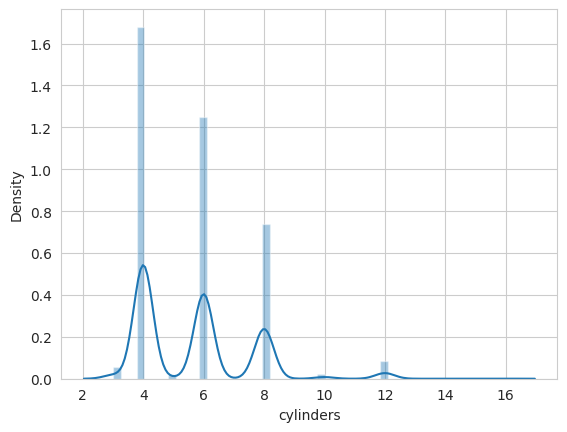

In [543]:
sns.distplot(df['cylinders'])

In [544]:
df.head()


,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Premium Gasoline,12.1,8.7,10.6,27,244


<Axes: xlabel='engine_size', ylabel='Density'>

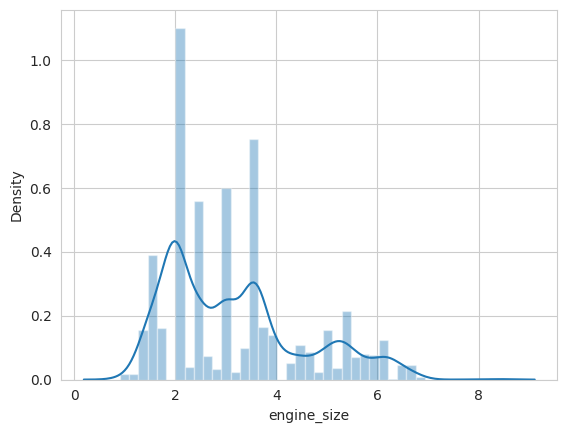

In [545]:
sns.distplot(df['engine_size'])

<Axes: xlabel='fuel_consumption_comb(l/100km)', ylabel='Density'>

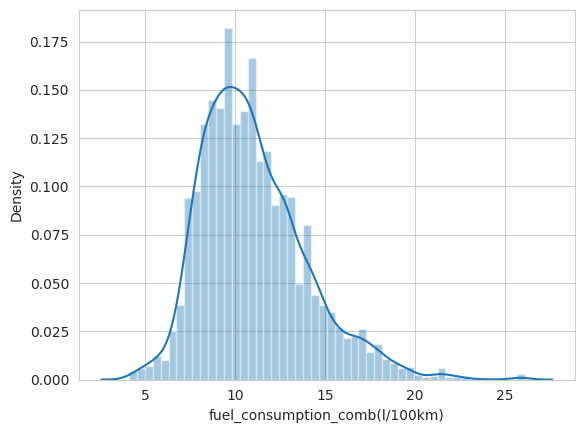

In [546]:
sns.distplot(df['fuel_consumption_comb(l/100km)'])

## <font color='red'>Variation in CO2 emissions with different features.</font>

### <font color='green'> CO2 Emission with model </font>

In [547]:
df_co2_make = df.groupby(['make'])['co2_emissions'].mean().sort_values().reset_index()

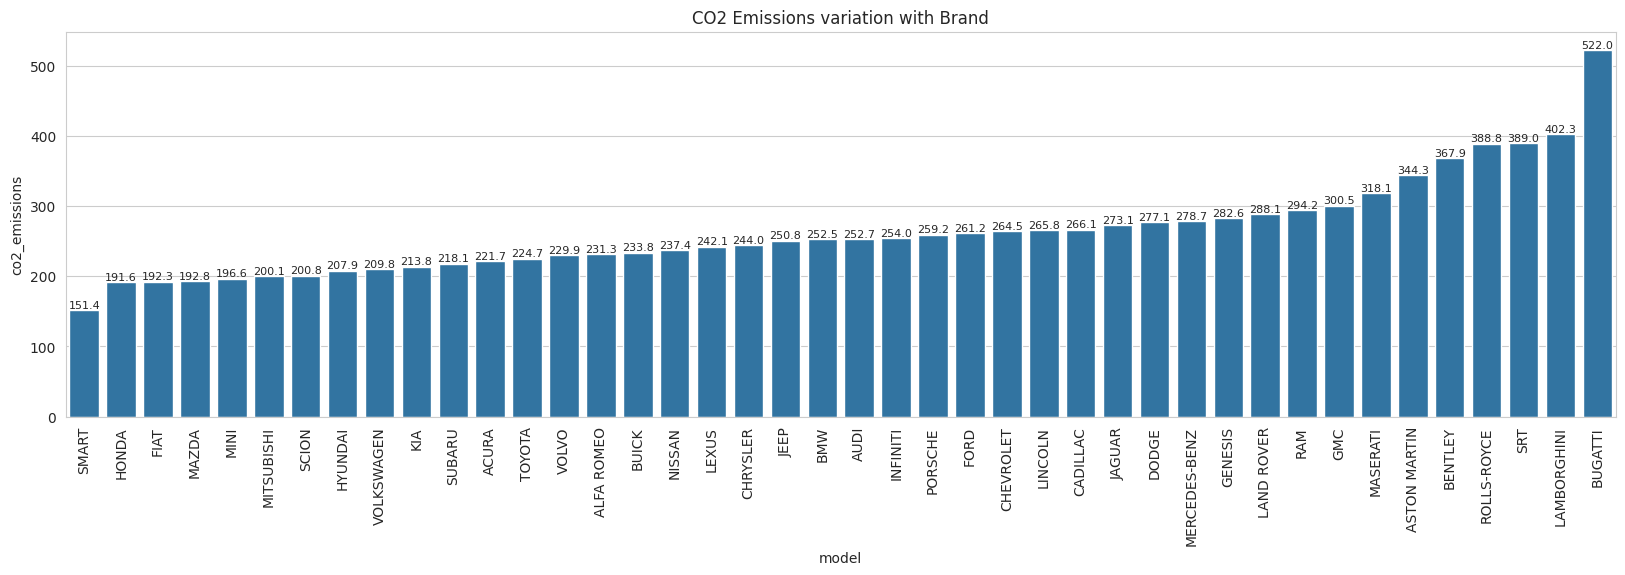

In [548]:
plt.figure(figsize=(20,5))
figure8 = sns.barplot(data = df_co2_make, x = "make",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Brand")
plt.xlabel("model")
plt.ylabel("co2_emissions")
plt.bar_label(figure8.containers[0], fontsize=8, fmt='%.1f')
plt.show()

**bold text**### <font color='green'> CO2 Emissions variation with Vehicle Class </font>

In [549]:
df_co2_vehicle_class = df.groupby(['vehicle_class'])['co2_emissions'].mean().sort_values().reset_index()

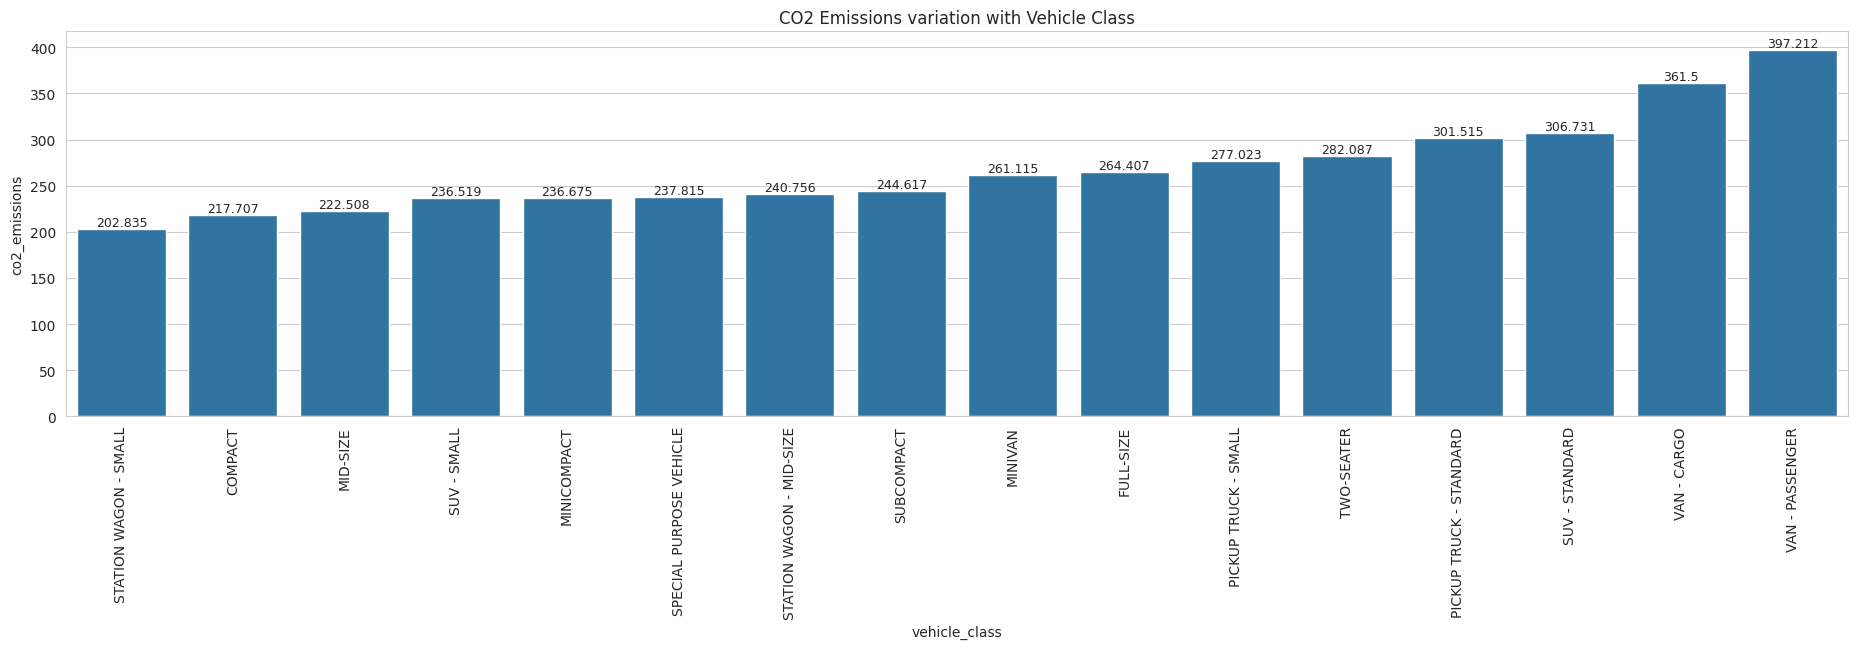

In [550]:
plt.figure(figsize=(23,5))
figure9 = sns.barplot(data = df_co2_vehicle_class, x = "vehicle_class",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Vehicle Class")
plt.xlabel("vehicle_class")
plt.ylabel("co2_emissions")
plt.bar_label(figure9.containers[0], fontsize=9)
plt.show()

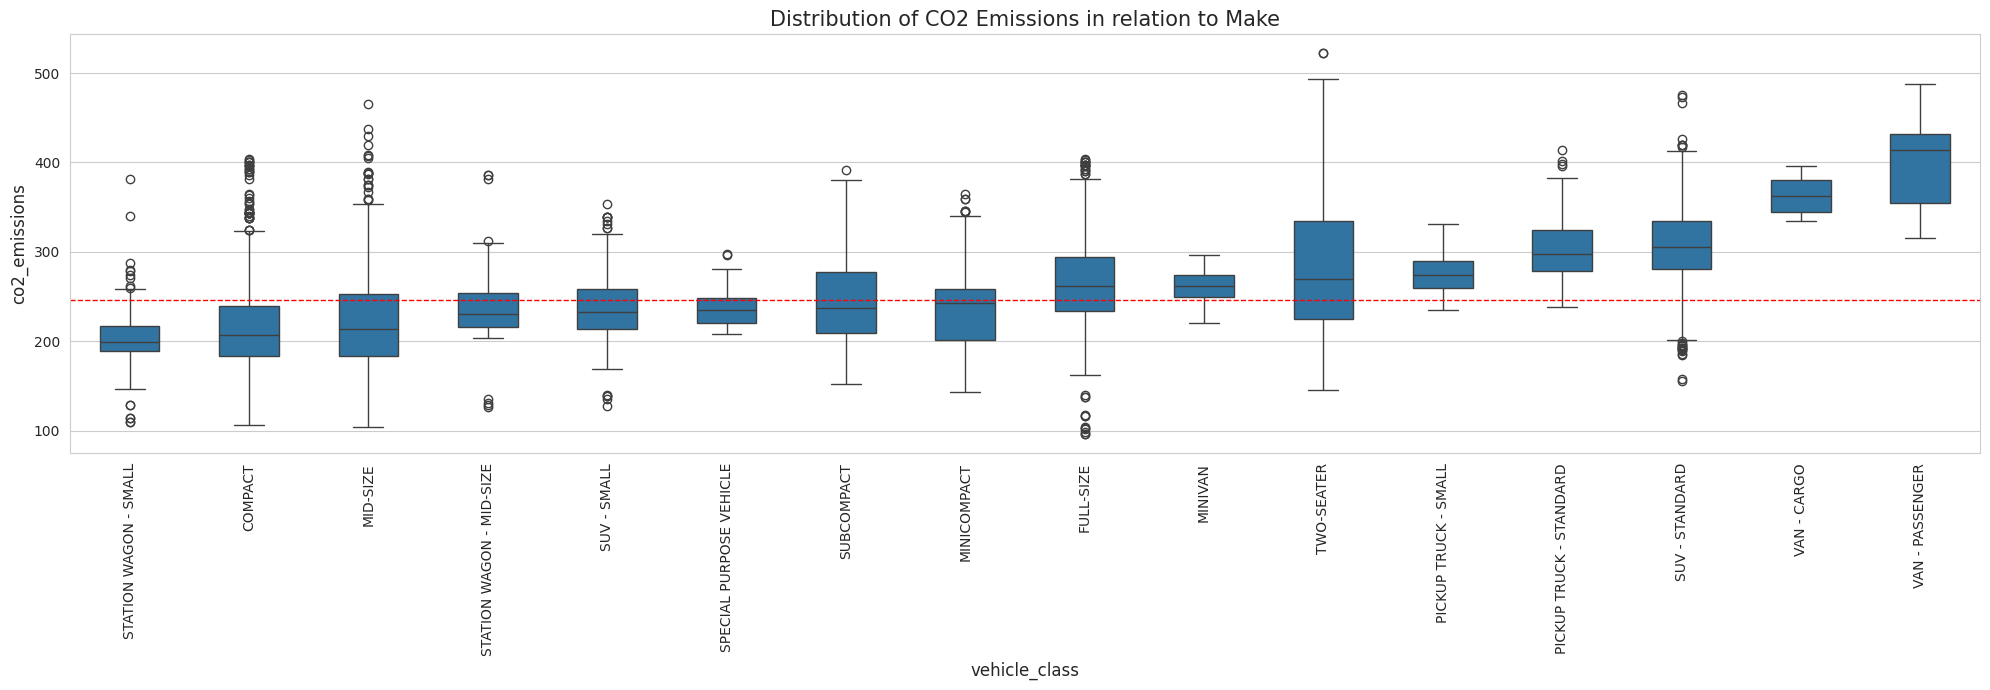

In [551]:
plt.figure(figsize=(20,7))
order = df.groupby("vehicle_class")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="vehicle_class", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("vehicle_class", fontsize=12)
plt.ylabel("co2_emissions", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

In [552]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Premium Gasoline,12.1,8.7,10.6,27,244


Categorical Encoding


In [553]:
#encoded the vehicle class, transmission, fuel type using one hot encoding
df_encoded = pd.get_dummies(df, columns=['vehicle_class', 'transmission', 'fuel_type'], drop_first='False')


In [554]:
df_encoded

,make,model,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,vehicle_class_FULL-SIZE,...,vehicle_class_VAN - CARGO,vehicle_class_VAN - PASSENGER,transmission_AM,transmission_AS,transmission_Continuously Variable,transmission_M,fuel_type_Ethanol(E85),fuel_type_Natural Gas,fuel_type_Premium Gasoline,fuel_type_Regular Gasoline
0,ACURA,ILX,2.0,4,9.9,6.7,8.5,33,196,False,...,False,False,False,True,False,False,False,False,True,False
1,ACURA,ILX,2.4,4,11.2,7.7,9.6,29,221,False,...,False,False,False,False,False,True,False,False,True,False
2,ACURA,ILX HYBRID,1.5,4,6.0,5.8,5.9,48,136,False,...,False,False,False,False,True,False,False,False,True,False
3,ACURA,MDX 4WD,3.5,6,12.7,9.1,11.1,25,255,False,...,False,False,False,True,False,False,False,False,True,False
4,ACURA,RDX AWD,3.5,6,12.1,8.7,10.6,27,244,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,VOLVO,XC40 T5 AWD,2.0,4,10.7,7.7,9.4,30,219,False,...,False,False,False,True,False,False,False,False,True,False
6269,VOLVO,XC60 T5 AWD,2.0,4,11.2,8.3,9.9,29,232,False,...,False,False,False,True,False,False,False,False,True,False
6270,VOLVO,XC60 T6 AWD,2.0,4,11.7,8.6,10.3,27,240,False,...,False,False,False,True,False,False,False,False,True,False
6271,VOLVO,XC90 T5 AWD,2.0,4,11.2,8.3,9.9,29,232,False,...,False,False,False,True,False,False,False,False,True,False


In [555]:
# Perform ANOVA (F-test) to find correlation between make and co2 emmision
f_stat, p_value = stats.f_oneway(*[df[df["make"] == make]["co2_emissions"] for make in df["make"].unique()])

print(f"F-statistic: {f_stat}, P-value: {p_value}")
# p value being less than 0.05 the relation is strong

F-statistic: 89.494768176978, P-value: 0.0


In [556]:
df_encoded["make_encoded"] = df.groupby("make")["co2_emissions"].transform("mean")
df_encoded["model_encoded"] = df.groupby("model")["co2_emissions"].transform("mean")

print(df.head())


    make       model vehicle_class  engine_size  cylinders  \
0  ACURA         ILX       COMPACT          2.0          4   
1  ACURA         ILX       COMPACT          2.4          4   
2  ACURA  ILX HYBRID       COMPACT          1.5          4   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6   

            transmission         fuel_type  fuel_consumption_city  \
0                     AS  Premium Gasoline                    9.9   
1                      M  Premium Gasoline                   11.2   
2  Continuously Variable  Premium Gasoline                    6.0   
3                     AS  Premium Gasoline                   12.7   
4                     AS  Premium Gasoline                   12.1   

   fuel_consumption_hwy  fuel_consumption_comb(l/100km)  \
0                   6.7                             8.5   
1                   7.7                             9.6   
2                   5.8            

In [557]:
df_encoded.head()

,make,model,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,vehicle_class_FULL-SIZE,...,transmission_AM,transmission_AS,transmission_Continuously Variable,transmission_M,fuel_type_Ethanol(E85),fuel_type_Natural Gas,fuel_type_Premium Gasoline,fuel_type_Regular Gasoline,make_encoded,model_encoded
0,ACURA,ILX,2.0,4,9.9,6.7,8.5,33,196,False,...,False,True,False,False,False,False,True,False,221.666667,200.285714
1,ACURA,ILX,2.4,4,11.2,7.7,9.6,29,221,False,...,False,False,False,True,False,False,True,False,221.666667,200.285714
2,ACURA,ILX HYBRID,1.5,4,6.0,5.8,5.9,48,136,False,...,False,False,True,False,False,False,True,False,221.666667,138.000000
3,ACURA,MDX 4WD,3.5,6,12.7,9.1,11.1,25,255,False,...,False,True,False,False,False,False,True,False,221.666667,255.000000
4,ACURA,RDX AWD,3.5,6,12.1,8.7,10.6,27,244,False,...,False,True,False,False,False,False,True,False,221.666667,243.750000


In [558]:
df_encoded.drop(['make', 'model'], axis=1, inplace=True)

In [559]:
df_encoded.head()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,vehicle_class_FULL-SIZE,vehicle_class_MID-SIZE,vehicle_class_MINICOMPACT,...,transmission_AM,transmission_AS,transmission_Continuously Variable,transmission_M,fuel_type_Ethanol(E85),fuel_type_Natural Gas,fuel_type_Premium Gasoline,fuel_type_Regular Gasoline,make_encoded,model_encoded
0,2.0,4,9.9,6.7,8.5,33,196,False,False,False,...,False,True,False,False,False,False,True,False,221.666667,200.285714
1,2.4,4,11.2,7.7,9.6,29,221,False,False,False,...,False,False,False,True,False,False,True,False,221.666667,200.285714
2,1.5,4,6.0,5.8,5.9,48,136,False,False,False,...,False,False,True,False,False,False,True,False,221.666667,138.000000
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,...,False,True,False,False,False,False,True,False,221.666667,255.000000
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,...,False,True,False,False,False,False,True,False,221.666667,243.750000


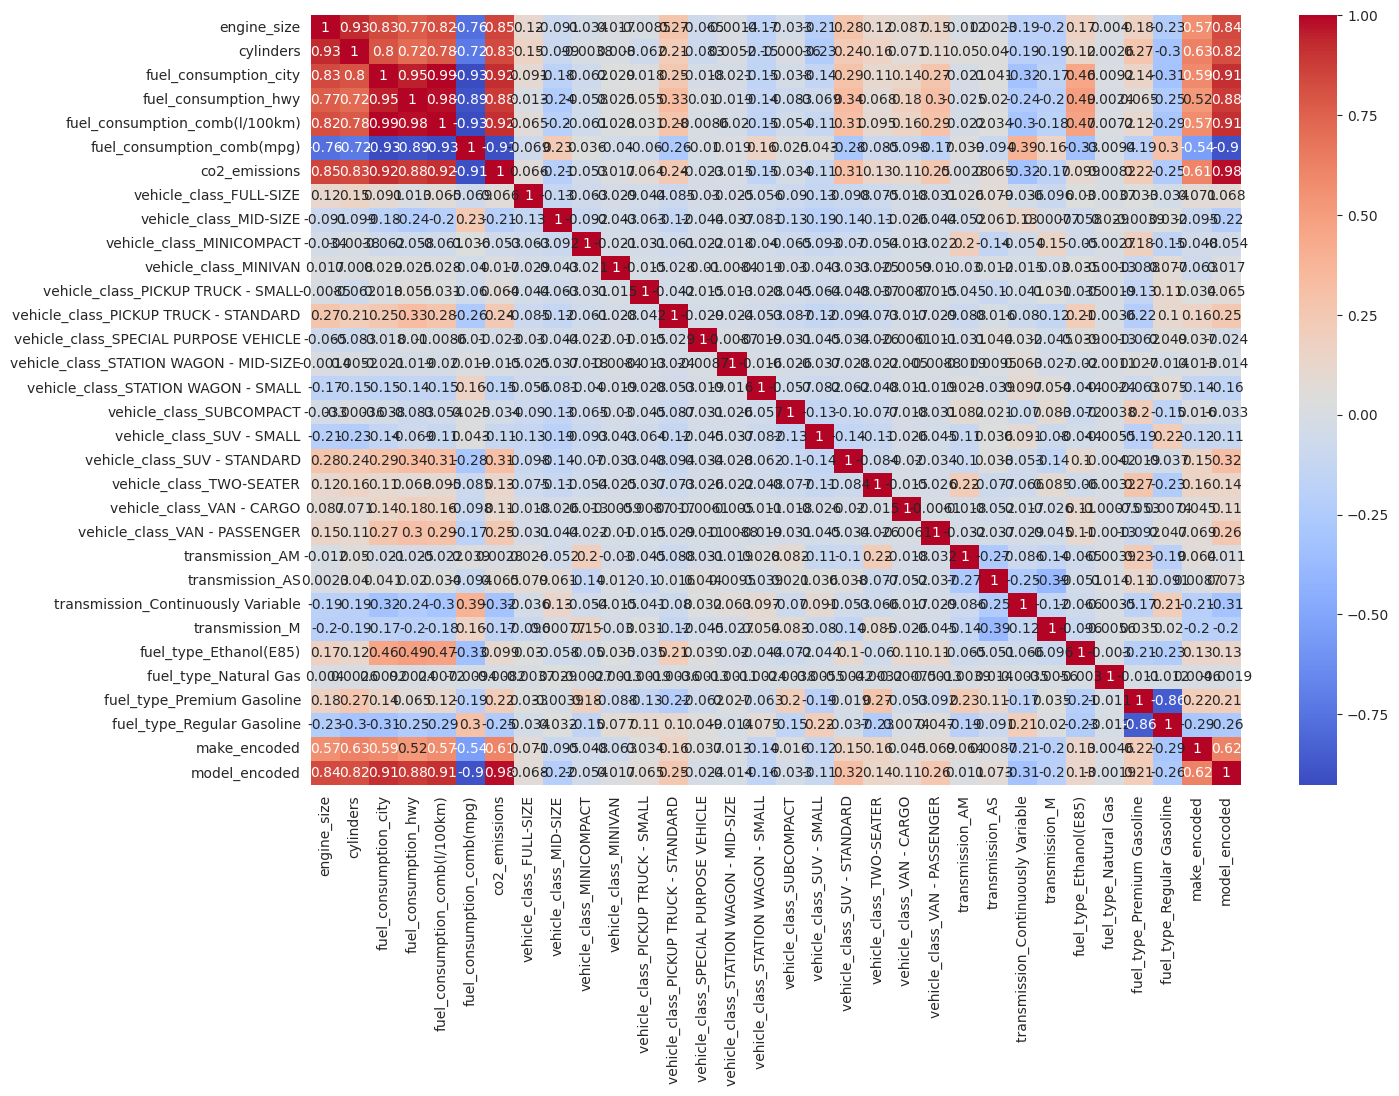

In [560]:

plt.figure(figsize=(15,10))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.show()


In [561]:
selected_features = ["engine_size", "cylinders", "fuel_consumption_city", "fuel_consumption_hwy", "fuel_consumption_comb(l/100km)"]
features= df_encoded[selected_features]
target = df_encoded['co2_emissions']

In [562]:
features.head()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km)
0,2.0,4,9.9,6.7,8.5
1,2.4,4,11.2,7.7,9.6
2,1.5,4,6.0,5.8,5.9
3,3.5,6,12.7,9.1,11.1
4,3.5,6,12.1,8.7,10.6


In [563]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)

In [564]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **SVR Model**

In [565]:
svr_model = SVR(kernel="rbf", C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

SVR()

In [566]:
y_pred = svr_model.predict(X_test_scaled)

In [567]:
mae_svr = mean_absolute_error(y_test, y_pred)
mse_svr = mean_squared_error(y_test, y_pred)
rmse_svr = np.sqrt(mse_svr)
r2_svr= r2_score(y_test, y_pred)


In [568]:
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.4f}")
print(f"R² Score: {r2_svr:.4f}")

Mean Absolute Error (MAE): 8.8983
Mean Squared Error (MSE): 454.7705
Root Mean Squared Error (RMSE): 21.3253
R² Score: 0.8731


###  **KNN Model**


In [569]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [570]:
knn = KNeighborsRegressor(n_neighbors = 2,metric = 'manhattan',weights = 'distance')
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=2, weights='distance')

In [571]:
y_pred_knn = knn.predict(X_test_scaled)

In [572]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [573]:
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.4f}")
print(f"R² Score: {r2_knn:.4f}")

Mean Absolute Error (MAE): 2.8776
Mean Squared Error (MSE): 70.2615
Root Mean Squared Error (RMSE): 8.3822
R² Score: 0.9804


In [574]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [575]:
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],'weights':['uniform', 'distance'],'p':[1,2]}

In [576]:
grid_search = GridSearchCV(knn, params)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(metric='manhattan', n_neighbors=2,
                                           weights='distance'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [577]:
grid_search.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

### **Random forest**

In [578]:
from sklearn.ensemble import RandomForestRegressor

In [579]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [580]:
y_rf_pred = rf_model.predict(X_test_scaled)
y_rf_pred

array([175.62666667, 246.07333333, 231.60666667, ..., 221.05233333,
       292.06      , 206.80916667])

In [581]:
print(rf_model.n_features_in_)  # Shows number of features used in training


5


In [582]:
mae_rf = mean_absolute_error(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_rf_pred)

In [583]:
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Mean Absolute Error (MAE): 3.3322
Mean Squared Error (MSE): 76.7032
Root Mean Squared Error (RMSE): 8.7580
R² Score: 0.9786


In [584]:
frames = [y_rf_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,175.626667,189.0
1,246.073333,242.0
2,231.606667,234.0
3,310.334833,306.0
4,171.728000,172.0


In [585]:
# analyzing the difference between predicted and actual values
y_rf_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_rf_pred['pred_values'] = (y_rf_pred['pred_values'].map(lambda x: round(x,2)))

y_rf_pred['diff'] = abs(y_rf_pred['real_values'] -y_rf_pred['pred_values'])


print('mean diff: ', abs(y_rf_pred['diff']).mean())


mean diff:  3.33206374501992


In [586]:
y_rf_pred.head(10)

,pred_values,real_values,diff
0,175.63,189.0,13.37
1,246.07,242.0,4.07
2,231.61,234.0,2.39
3,310.33,306.0,4.33
4,171.73,172.0,0.27
5,292.34,290.0,2.34
6,280.12,285.0,4.88
7,171.64,172.0,0.36
8,168.14,169.0,0.86
9,240.92,244.0,3.08


### **Linear Regression**

In [587]:
from sklearn.linear_model import LinearRegression

In [588]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [589]:
y_pred_lr = lr.predict(X_test_scaled)

In [590]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [591]:
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

Mean Absolute Error (MAE): 14.3506
Mean Squared Error (MSE): 474.0901
Root Mean Squared Error (RMSE): 21.7736
R² Score: 0.8677


### **comparison of model**


In [592]:
results = {
    "Linear Regression": {
        "MAE": mae_lr,
        "MSE": mse_lr,
        "RMSE": rmse_lr,
        "R² Score": r2_lr
    },
    "KNN Regressor": {
        "MAE": mae_knn,
        "MSE": mse_knn,
        "RMSE": rmse_knn,
        "R² Score": r2_knn
    },
    "Random Forest": {
        "MAE": mae_rf,
        "MSE": mse_rf,
        "RMSE": rmse_rf,
        "R² Score": r2_rf
    },
    "SVR": {
        "MAE": mae_svr,
        "MSE": mse_svr,
        "RMSE": rmse_svr,
        "R² Score": r2_svr
    }
}

In [593]:
results_df = pd.DataFrame(results).T  # Transpose for better readability
print(results_df)

                         MAE         MSE       RMSE  R² Score
Linear Regression  14.350613  474.090122  21.773611  0.867738
KNN Regressor       2.877631   70.261490   8.382213  0.980398
Random Forest       3.332190   76.703222   8.758038  0.978601
SVR                 8.898251  454.770536  21.325350  0.873128


In [594]:
sns.set_style("whitegrid")
metrics = ["MAE", "RMSE", "R² Score"]
colors = ["viridis", "coolwarm", "magma"]

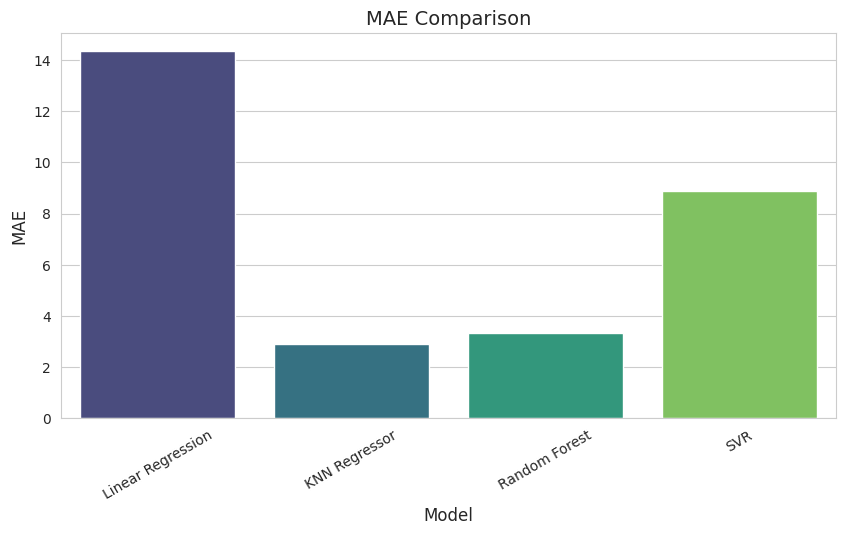

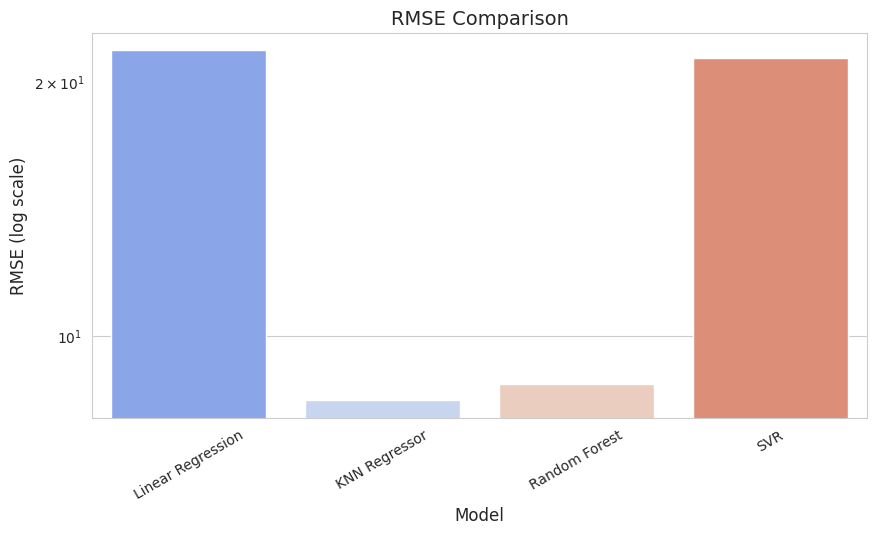

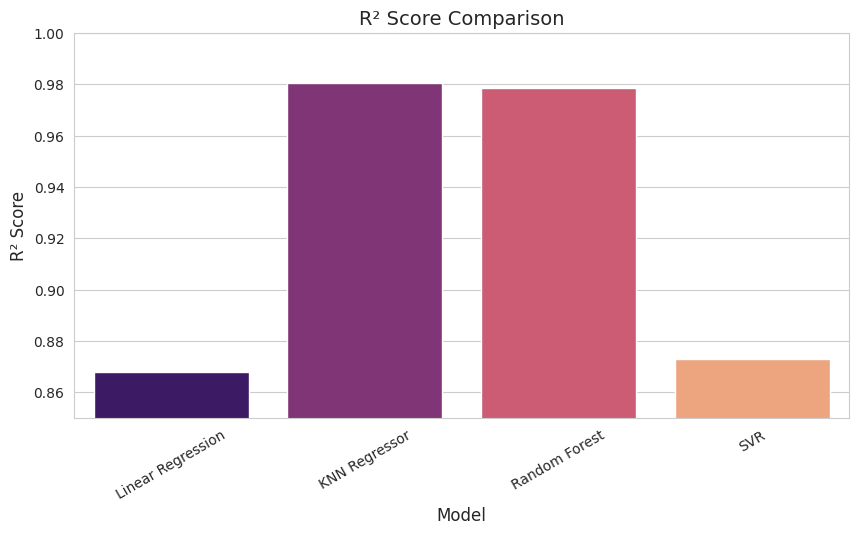

In [595]:
for metric, color in zip(metrics, colors):
    plt.figure(figsize=(10, 5))
    ax= sns.barplot(x=results_df.index, y=results_df[metric], palette=color)
    plt.title(f"{metric} Comparison", fontsize=14)
    plt.xlabel("Model", fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(rotation=30)
    if metric in ["MSE", "RMSE"]:
        ax.set_yscale("log")  # Logarithmic scale for large value differences
        plt.ylabel(f"{metric} (log scale)", fontsize=12)
    if metric == "R² Score":
        plt.ylim(0.85, 1)

    plt.show()


In [596]:
import pickle

In [598]:
file = "co2_rf_model.pkl"


In [599]:
pickle.dump(rf_model, open(file, "wb"))